<a href="https://colab.research.google.com/github/dasdasqs2/pdm05/blob/master/py-tensorflow/tf2_7_fmnist_CNN_best.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of fmnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    * FCN : 1차원 완전연결신경망

***
- ## Traget: Find the best model
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

## Search the best model of C2F2
- callback
    - Early stopping
    - model checkpoint

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(0)
print(tf.__version__)

2.3.0


In [4]:
# import TF2 submodules
from tensorflow.keras import layers, models, callbacks

## **데이터 로딩, 정규화**

In [5]:
from keras.datasets import fashion_mnist

(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

4423680/4422102 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [6]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [7]:
# y_train0.shape vs. y_train.shape
y_train0.shape, y_train.shape

((60000,), (60000, 10))

### Display fashions
- one random fashion
- 10 representative fashions

47233


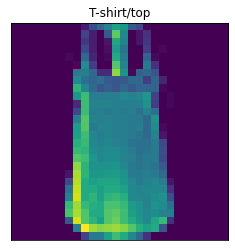

In [8]:
# Code here!
# display one random image from the training set:
class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(0, X_train0.shape[0])
print(idx)
image = X_train0[idx]
plt.imshow(image) #, cmap=plt.get_cmap('gray'))
plt.title(class_names[y_train0[idx]])
plt.xticks([])
plt.yticks([])
plt.show()

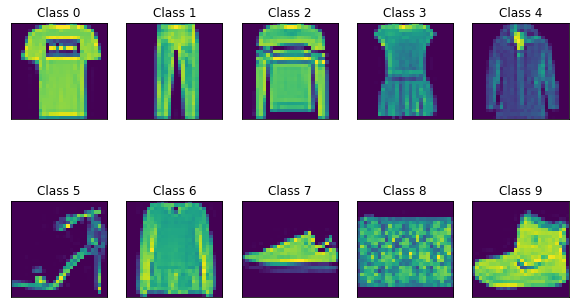

In [9]:
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    # print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

# Design CNN

### import models, layers, callbacks
- models: Sequential
- layers: Conv2D, MaxPool2D, Flatten
- callbacks: ModelCheckpoint, EarlyStopping

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping

##**CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [11]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [12]:
c1f2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
__________________________________________________

In [13]:
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4225 - accuracy: 0.8503
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2870 - accuracy: 0.8965
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2465 - accuracy: 0.9110
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2170 - accuracy: 0.9201
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1951 - accuracy: 0.9274
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1752 - accuracy: 0.9356
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1611 - accuracy: 0.9392
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1439 - accuracy: 0.9466
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1326 - accuracy: 0.9497
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.121

In [14]:
c1f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3540 - accuracy: 0.9206


[0.353976845741272, 0.9205999970436096]

## **CNN1 + FCN3** 

In [15]:
c1f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    Dense(256, activation='relu'),  
    Dropout(0.25), 
    Dense(128, activation='relu'),  
    Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [16]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [17]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4444 - accuracy: 0.8414
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2940 - accuracy: 0.8935
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2472 - accuracy: 0.9099
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2160 - accuracy: 0.9190
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1965 - accuracy: 0.9273
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1707 - accuracy: 0.9370
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1577 - accuracy: 0.9424
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1405 - accuracy: 0.9478
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1266 - accuracy: 0.9524
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.114

In [18]:
c1f3.evaluate(X_test, y_test, batch_size= 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.9187


[0.40018749237060547, 0.9186999797821045]

## **CNN2 + FCN2**

In [19]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [20]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [44]:
cp_callback = callbacks.ModelCheckpoint(filepath="./fmnist_c2f2_best_weights.{epoch:03d}-{val_accuracy:.4f}.hdf5", 
                              monitor='val_accuracy', verbose=0, save_best_only=True)
es_callback = callbacks.EarlyStopping(monitor='val_accuracy', 
                            mode='max', verbose=1, patience=50)    # patience=10, 20, 50

In [45]:
hist = c2f2.fit(X_train, y_train, epochs = 500 , batch_size =32, 
         callbacks=[cp_callback, es_callback], 
         validation_data=(X_test,y_test))

Epoch 1/500
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0286 - accuracy: 0.9898 - val_loss: 0.5511 - val_accuracy: 0.9214
Epoch 2/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.5682 - val_accuracy: 0.9186
Epoch 3/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9901 - val_loss: 0.6652 - val_accuracy: 0.9208
Epoch 4/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.6890 - val_accuracy: 0.9219
Epoch 5/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0295 - accuracy: 0.9896 - val_loss: 0.6479 - val_accuracy: 0.9186
Epoch 6/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0241 - accuracy: 0.9916 - val_loss: 0.6034 - val_accuracy: 0.9233
Epoch 7/500
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9914 - val_loss: 0.6247 - val_ac

In [46]:
c2f2.evaluate(X_test, y_test, batch_size =32)

313/313 [==============================] - 1s 2ms/step - loss: 1.0029 - accuracy: 0.9239


[1.0029089450836182, 0.9239000082015991]

## **CNN2 + FCN3**

In [53]:
c2f3 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(64, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [54]:
c2f3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [26]:
c2f3.fit(X_train, y_train, epochs=20, batch_size =32)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5160 - accuracy: 0.8153
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3226 - accuracy: 0.8855
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2711 - accuracy: 0.9027
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2385 - accuracy: 0.9144
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2158 - accuracy: 0.9216
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1960 - accuracy: 0.9291
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1813 - accuracy: 0.9342
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1655 - accuracy: 0.9383
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1553 - accuracy: 0.9437
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.143

In [27]:
 c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.9173


[0.3471534550189972, 0.9172999858856201]

# **[DIY] Hidden layer에 따른 정확도**

In [47]:
c1f2score = c1f2.evaluate(X_test, y_test, batch_size = 32)
c1f3score = c1f3.evaluate(X_test, y_test, batch_size = 32)
c2f2score = c2f2.evaluate(X_test, y_test, batch_size = 32)
c2f3score = c2f3.evaluate(X_test, y_test, batch_size = 32)

313/313 [==============================] - 1s 2ms/step - loss: 0.3472 - accuracy: 0.9173


In [48]:
accuracy = [c1f2score[1], c1f3score[1], c2f2score[1], c2f3score[1]]
accuracy

[0.9205999970436096,
 0.9186999797821045,
 0.9239000082015991,
 0.9172999858856201]

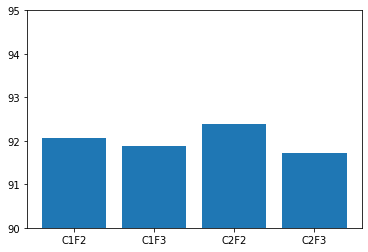

In [55]:
x = np.arange(4)
cnns = ['C1F2','C1F3','C2F2','C2F3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((90, 95))
plt.show()

## Graph of loss and accuracy
- model: C2F2

In [67]:
c2f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),filters= 32,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(kernel_size=(3,3),strides=(1,1),filters= 64,padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(), 
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [68]:
c2f2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               401536    
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)              

In [69]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =32, 
         validation_data=(X_test,y_test))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4499 - accuracy: 0.8373 - val_loss: 0.3134 - val_accuracy: 0.8860
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8935 - val_loss: 0.2767 - val_accuracy: 0.8966
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2455 - accuracy: 0.9111 - val_loss: 0.2571 - val_accuracy: 0.9073
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2135 - accuracy: 0.9205 - val_loss: 0.2368 - val_accuracy: 0.9127
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1900 - accuracy: 0.9288 - val_loss: 0.2478 - val_accuracy: 0.9145
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1688 - accuracy: 0.9372 - val_loss: 0.2197 - val_accuracy: 0.9227
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1510 - accuracy: 0.9438 - val_loss: 0.2309 - val_accuracy:

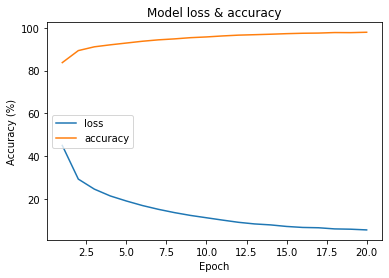

In [71]:
# Plot loass and accuracy
# Plot training & validation accuracy values

epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

In [35]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]

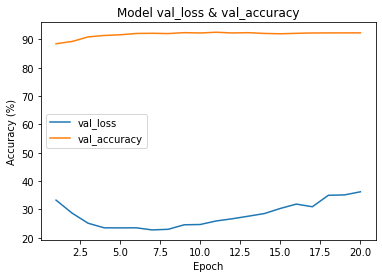

In [36]:
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

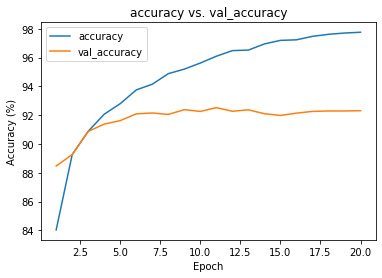

In [37]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy']) #, loc='center bottom')

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [38]:
c2f2.save('fmnist_cnn_best.hdf5')

In [65]:
from keras.models import load_model

model = load_model('fmnist_c2f2_best_weights.039-0.9287.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.8566 - accuracy: 0.9287


[0.856574535369873, 0.9286999702453613]